In [1]:
import glob, string
import matplotlib.pyplot as plt
from multiprocessing import Pool
import re
import numpy as np
import random
import os
import sys
%matplotlib inline

In [2]:
original_text = "This text is a mess!\nIt contains a lot of punctuation, numb3rs and missspeleds words!"

In [3]:

pattern = r'(?u)\b[A-Za-z]{1,}\b'

# Telling: 
#      (?u)     = at most one unicode char
#      \b       = the end of a word is indicated by whitespace or a non-alphanumeric, non-underscore character.
#                 matches empty string at beginning or end of word.
#      [A-Za-z] = any character from the indicated sets: ascii lower or upper chars;
#      {3,}     = at least 3 of the last match, unbounded in length: {m,n} at least m and up to n.

re.findall(pattern=pattern, string=original_text) # Neat! (note that `is`, `a`, `of`, etc. are missing!)



['This',
 'text',
 'is',
 'a',
 'mess',
 'It',
 'contains',
 'a',
 'lot',
 'of',
 'punctuation',
 'and',
 'missspeleds',
 'words']

In [4]:
def count_words(subdf):
    word_lists = subdf.body.str.lower().map(lambda x: re.findall(pattern, x))
    df = pd.concat(pd.DataFrame({'word': word_list}) for word_list in word_lists)
    return df.groupby('word').size()

In [5]:
import pandas as pd

In [6]:
dirname = "/home/alberto/Dropbox/codice vario/beaker/txt"
def get_files_by_file_size(dirname, reverse=False):
    """ Return list of file paths in directory sorted by file size """

    # Get list of files
    filepaths = []
    for path, subdirs, files in os.walk(dirname):
        for name in files:
            filepaths.append(os.path.join(path, name))

    # Re-populate list with filename, size tuples
    for i in xrange(len(filepaths)):
        filepaths[i] = (filepaths[i], os.path.getsize(filepaths[i]))

    # Sort list by file size
    # If reverse=True sort from largest to smallest
    # If reverse=False sort from smallest to largest
    #filepaths.sort(key=lambda filename: filename[1], reverse=True)

    # Re-populate list with just filenames
    for i in xrange(len(filepaths)):
        filepaths[i] = filepaths[i][0]

    return filepaths

In [7]:
files=get_files_by_file_size(dirname, reverse=False)
#print files
def batch_gen(data, batch_size):
    for i in range(0, len(data), batch_size):
            yield data[i:i+batch_size]

In [8]:
def loadAnalyzedText(textLocation,aut,tit):
    #wordString = ()
    #articles=[]
    #titles=[]
    #categories=[]
    
    df = pd.DataFrame(columns=['title','author','text'])
    with open(textLocation, 'r') as f:
        line=f.read().lower()
        text=re.findall(pattern=pattern, string=line)
        
    df.loc[len(df)]=[tit,aut,text]
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    df.drop(['index'],axis=1,inplace=True)
    return df

In [9]:
df = pd.DataFrame(columns=['title','author','text'])

In [10]:
len(files)

3036

In [11]:
files[0]

'/home/alberto/Dropbox/codice vario/beaker/txt/Thomas Carlyle___On the Choice of Books.txt'

In [14]:
import time

In [15]:
t_in=time.time()
pattern2=r'\b/.*_\b'
i=0
for pages in files[:]:
    #print pages
    aut,tit=re.search(r'txt/(.*?).txt', pages).group(1).split('___')
    tmpdf=loadAnalyzedText(pages,aut.lower(),tit.lower())
    df=pd.concat([df,tmpdf])
    if i %10 ==0: 
        sys.stdout.write("\rFile number %i of %i after %f seconds" % (i,len(files),time.time()-t_in))
        sys.stdout.flush()
    i+=1

File number 3030 of 3036 after 129.071467 seconds

df.to_csv('gut.csv',index=False)

In [16]:
df.head()

,title,author,text
0,on the choice of books,thomas carlyle,"[on, the, choice, of, books, thomas, carlyle, ..."
0,gulliver's travels,jonathan swift,"[s, travels, into, several, remote, nations, o..."
0,anglo-saxon britain,grant allen,"[illustration, britain, in, a, d, early, brita..."
0,the great secret,edward phillips oppenheim,"[the, great, secret, by, e, phillips, oppenhei..."
0,annie kilburn,william dean howells,"[annie, kilburn, a, novel, by, w, d, howells, ..."


In [17]:
authors=df.groupby('author').agg({'title':'count'})

In [18]:
authors.head()

,title
author,
abraham lincoln,16
agatha christie,2
albert einstein,2
aldous huxley,3
alexander pope,6


In [19]:
top_auth=authors.sort_values(by='title',ascending=False).reset_index()[:5]['author']

In [20]:
top_auth=list(top_auth)

## Authors selection
 top representing authors


In [21]:
df_sub_auth=df[df['author'].isin(top_auth)]

In [22]:
df_sub_auth

,title,author,text
0,annie kilburn,william dean howells,"[annie, kilburn, a, novel, by, w, d, howells, ..."
0,sketches and studies,nathaniel hawthorne,"[sketches, and, studies, by, nathaniel, hawtho..."
0,"henry james, jr",william dean howells,"[henry, james, jr, by, william, dean, howells,..."
0,an old woman's tale,nathaniel hawthorne,"[the, doliver, romance, and, other, pieces, ta..."
0,"the skipper’s wooing, and the brown man’s servant",william wymark jacobs,"[the, s, wooing, and, the, brown, s, servant, ..."
0,"a search for a secret, a novel, volume 3",george alfred henty,"[a, search, for, a, secret, a, novel, by, g, a..."
0,wrecked but not ruined,r m ballantyne,"[wrecked, but, not, ruined, by, r, m, ballanty..."
0,ragged lady,william dean howells,"[ragged, lady, by, william, dean, howells, par..."
0,one of the 28th,george alfred henty,"[one, of, the, a, tale, of, waterloo, by, g, a..."
0,sketches from memory,nathaniel hawthorne,"[the, doliver, romance, and, other, pieces, ta..."


# Adj matrix

In [23]:
mask1=df['author']=='james joyce'
mask2=df['title']=='ulysses'

In [24]:
ulysses=df[mask1&mask2]

In [25]:
txt_uly=list(ulysses['text'])[0]

In [26]:
import collections

In [28]:
txt_uly_coup=[(i+','+j) for (i,j) in zip(txt_uly,txt_uly[1:])]

Adj_matrix=collections.Counter(txt_uly_coup)

word_c=collections.Counter(txt_uly)

In [29]:
Adj_matrix['dog,he']

3

In [30]:
len(Adj_matrix)

153345

In [33]:
TOT_word=sum(word_c.values())

TOT_coup=sum(Adj_matrix.values())



word_w= {x:float(word_c[x])/TOT_word for x in word_c.keys()}
print max(word_w, key=word_w.get),word_w[max(word_w, key=word_w.get)]**2


the 0.00311035966652


In [34]:
ratio=[]
for i in Adj_matrix.keys():
    #print i.split(',')
    #print Adj_matrix[i]
    w1,w2=i.split(',')
    w_ij=float(Adj_matrix[i])
    w_i_w_j=word_w[w2]*word_w[w1]*TOT_word
    ratio.append((w_ij,w_i_w_j,i))

w_ij,w_i_j,parole=zip(*ratio)

In [35]:
sorted(sorted(ratio,key=lambda x:x[1],reverse=True)[:10**2],reverse=True)[:10]

[(1624.0, 453.86113128439337, 'of,the'),
 (1439.0, 274.8932804252611, 'in,the'),
 (702.0, 117.78750421143263, 'on,the'),
 (618.0, 276.34331598847007, 'to,the'),
 (512.0, 401.715621607457, 'and,the'),
 (404.0, 198.293871897578, 'of,a'),
 (375.0, 71.83253097742671, 'at,the'),
 (353.0, 107.69302586755512, 'for,the'),
 (343.0, 120.10205143563059, 'in,a'),
 (328.0, 101.47747538651595, 'of,his')]

In [36]:
max(w_i_j)

830.8703777187137

In [38]:
plt.rc('text', usetex=True)
font = {'family':'serif','size':20}
plt.rc('font',**font)


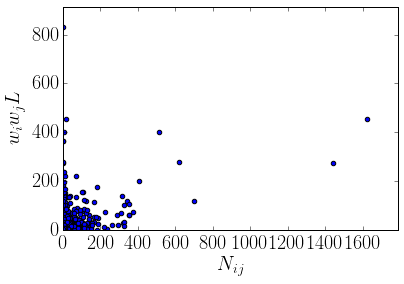

In [40]:
plt.scatter(w_ij,w_i_j)
plt.xlim((min(w_ij),max(w_ij)*1.1))
plt.ylim((-1*10**-4,max(w_i_j)*1.1))
plt.xlabel(r'$ N_{ij} $')
plt.ylabel(r'$ w_{i}w_j L$')
plt.show()

In [41]:
len(word_c)**2

816302041

In [42]:
len(Adj_matrix)

153345

# Shuffle

In [43]:
import copy
uly_shuf=copy.deepcopy(txt_uly)

In [44]:
random.shuffle(uly_shuf)

In [45]:
uly_shuf[:10]

['red',
 'said',
 'howth',
 'i',
 'house',
 'to',
 'three',
 'all',
 'greatest',
 'ward']

In [46]:
shf_uly_coup=[(i+','+j) for (i,j) in zip(uly_shuf,uly_shuf[1:])]
Adj_matrix_shf=collections.Counter(shf_uly_coup)
word_c_s=collections.Counter(uly_shuf)

In [47]:
TOT_word_s=sum(word_c_s.values())
TOT_coup_s=sum(Adj_matrix_shf.values())

word_w_s= {x:float(word_c_s[x])/TOT_word_s for x in word_c_s.keys()}

In [48]:
word_w_s;

In [49]:
ratio_s=[]
for i in Adj_matrix_shf.keys():
    #print i.split(',')
    #print Adj_matrix[i]
    w1_s,w2_s=i.split(',')
    w_ij_s=float(Adj_matrix_shf[i])
    w_i_w_j_s=word_w_s[w2_s]*word_w_s[w1_s]*TOT_word_s
    ratio_s.append((w_ij_s,w_i_w_j_s,i))

w_ij_s,w_i_j_s,parole=zip(*ratio_s)

In [50]:
sorted(sorted(ratio_s,key=lambda x:x[1],reverse=True)[:10**2],reverse=True)[:10]

[(829.0, 830.8703777187137, 'the,the'),
 (449.0, 453.86113128439337, 'the,of'),
 (448.0, 401.715621607457, 'the,and'),
 (439.0, 453.86113128439337, 'of,the'),
 (391.0, 363.0108261894958, 'a,the'),
 (383.0, 401.715621607457, 'and,the'),
 (351.0, 363.0108261894958, 'the,a'),
 (315.0, 274.8932804252611, 'in,the'),
 (305.0, 276.34331598847007, 'to,the'),
 (278.0, 274.8932804252611, 'the,in')]

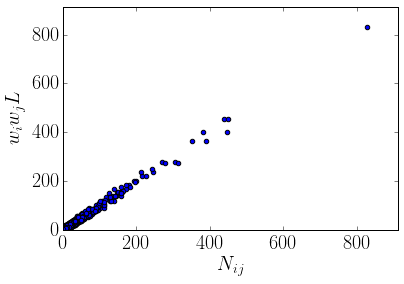

In [51]:
plt.scatter(w_ij_s,w_i_j_s)
plt.xlim((min(w_ij_s),max(w_ij_s)*1.1))
plt.ylim((-1*10**-4,max(w_i_j_s)*1.1))
plt.xlabel(r'$ N_{ij} $')
plt.ylabel(r'$ w_{i}w_j L$')
plt.show()

In [52]:
len(Adj_matrix_shf)

187750

# New words

In [53]:
def NewWords(book,win):
    L=len(book)
    if L>10**4:
        L=10**4
    NewWords=[len(set(book[0:i+win])) for i in xrange(0, L, win)]
    
    return NewWords

In [54]:
df_sub_auth.loc[:,'newWordsPerWindow']= df_sub_auth.loc[:,'text'].apply(lambda x:NewWords(x,500))

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
df.reset_index(inplace=True)

In [56]:
heaps=df_sub_auth[['newWordsPerWindow','author']]

In [57]:
heaps.sort_values(by='author')

,newWordsPerWindow,author
0,"[279, 452, 567, 675, 809, 892, 991, 1060, 1136...",george alfred henty
0,"[269, 437, 584, 695, 815, 926, 1005, 1101, 118...",george alfred henty
0,"[246, 390, 507, 610, 689, 754, 827, 895, 954, ...",george alfred henty
0,"[281, 451, 566, 702, 797, 880, 992, 1101, 1193...",george alfred henty
0,"[217, 452, 593, 735, 846, 921, 984, 1066, 1184...",george alfred henty
0,"[289, 465, 635, 764, 878, 979, 1053, 1110, 120...",george alfred henty
0,"[268, 470, 600, 711, 862, 973, 1067, 1153, 120...",george alfred henty
0,"[289, 487, 631, 758, 848, 942, 1056, 1161, 124...",george alfred henty
0,"[256, 410, 538, 648, 773, 878, 956, 1071, 1172...",george alfred henty
0,"[273, 469, 607, 717, 809, 923, 1022, 1113, 119...",george alfred henty


In [65]:
win=heaps['newWordsPerWindow']
aut=heaps['author']

In [66]:
aut=np.unique(aut)

In [67]:
from matplotlib.cm import jet

def get_n_colors(n):
    return[ jet(float(i)/n) for i in range(n) ]

colors = get_n_colors(len(aut))

In [68]:
colors

[(0.0, 0.0, 0.5, 1.0),
 (0.0, 0.29999999999999999, 1.0, 1.0),
 (0.16129032258064513, 1.0, 0.80645161290322587, 1.0),
 (0.80645161290322565, 1.0, 0.16129032258064513, 1.0),
 (1.0, 0.40740740740740755, 0.0, 1.0)]

In [69]:
color_map = dict(zip(aut, colors)) 
colorize = lambda x : color_map[x]
c = list(map(colorize, aut))

In [70]:
id_color={a:b for a,b in zip(aut,colors)}

In [71]:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in id_color.values()]

In [73]:
tmp=[]

for i in heaps['newWordsPerWindow'].values:
    tmp.append(i)

In [74]:
trans=map(None,*tmp)
transposed=[[x for x in L if x is not None] for L in trans]

In [75]:
mean_sd=[(np.nanmean(i),np.nanstd(i)) for i in transposed]

In [76]:
mean_sd

[(262.38247863247864, 18.29089121799943),
 (441.80769230769232, 38.420266317470073),
 (589.8098290598291, 60.056064881330755),
 (719.76231263383295, 81.221544075822138),
 (836.63282937365011, 101.83730705383645),
 (941.12938596491233, 121.45934059250783),
 (1041.1940639269405, 139.91865301838757),
 (1133.2668213457077, 160.85760816844635),
 (1228.9079601990049, 180.06025521689827),
 (1337.7249999999999, 186.76953843202352),
 (1440.7823529411764, 184.94140482323874),
 (1525.7824773413897, 194.65437910884378),
 (1602.559633027523, 206.82000763236587),
 (1679.3846153846155, 219.04180790312031),
 (1750.5345911949685, 230.02123992368146),
 (1825.8498402555911, 241.1713424718761),
 (1899.058064516129, 251.42201352820416),
 (1969.0806451612902, 262.61295562881105),
 (2042.6384364820847, 268.9643599560091),
 (2107.2377850162866, 280.35066246913948)]

In [77]:
mean,sd=zip(*mean_sd)

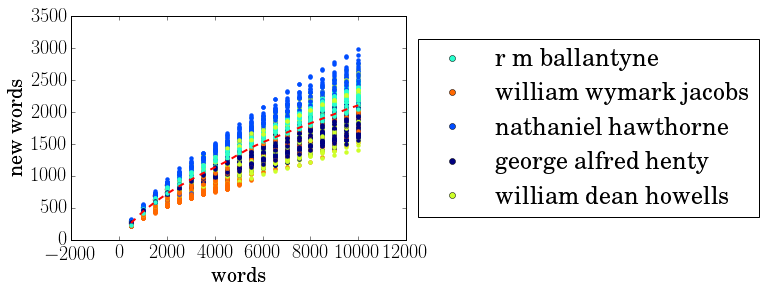

In [79]:
for plottino in heaps.values[:]:
    #print plottino
    #print len(plottino),len([(1+i)*500 in range(len(plottino))])
    
    plt.scatter([(1+i)*500 for i in range(len(plottino[0]))],plottino[0],marker='o',c=color_map[plottino[1]],linewidths=0)
lgd = plt.legend(markers, id_color.keys(), numpoints=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([(1+i)*500 for i in range(len(mean))],mean,'r--',label='mean',linewidth=2)
plt.xlabel('# words')
plt.ylabel('# new words')
#plt.savefig('heaps_books.pdf', bbox_inches='tight', bbox_extra_artist=[lgd])
plt.show()

In [81]:
def func(x,mean,sd):
    result=[(i-j)/k for i,j,k in zip(x,mean,sd)]
    return result

In [82]:
df_sub_auth.loc[:,'measure']= df_sub_auth.loc[:,'newWordsPerWindow'].apply(lambda x:func(x,mean,sd))

In [83]:
df_sub_auth.head()

,title,author,text,newWordsPerWindow,measure
0,annie kilburn,william dean howells,"[annie, kilburn, a, novel, by, w, d, howells, ...","[261, 402, 548, 689, 860, 1012, 1131, 1222, 12...","[-0.075582901675, -1.03611182647, -0.696179963..."
0,sketches and studies,nathaniel hawthorne,"[sketches, and, studies, by, nathaniel, hawtho...","[263, 489, 642, 773, 933, 1046, 1176, 1273, 13...","[0.0337611415519, 1.22831807834, 0.86902415340..."
0,"henry james, jr",william dean howells,"[henry, james, jr, by, william, dean, howells,...","[258, 447, 584, 718, 846, 971, 1060, 1136]","[-0.239598966515, 0.135145020844, -0.096740088..."
0,an old woman's tale,nathaniel hawthorne,"[the, doliver, romance, and, other, pieces, ta...","[289, 510, 678, 843, 1005, 1146, 1259, 1278]","[1.4552337035, 1.77490460708, 1.46846402798, 1..."
0,"the skipper’s wooing, and the brown man’s servant",william wymark jacobs,"[the, s, wooing, and, the, brown, s, servant, ...","[268, 438, 590, 725, 840, 960, 1047, 1126, 119...","[0.307121249619, -0.099106348619, 0.0031665567..."


In [85]:
from itertools import chain
dic_aut={}
for i in aut:
    print i
    flat=list(chain.from_iterable(list(df_sub_auth[df_sub_auth['author']==i]['measure'])))
    dic_aut[i]=flat


george alfred henty
nathaniel hawthorne
r m ballantyne
william dean howells
william wymark jacobs


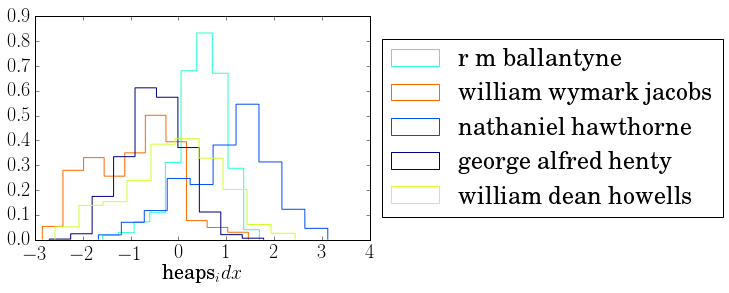

In [87]:
for blob in dic_aut.keys():
    plt.hist(dic_aut[blob],label=blob,histtype='step',normed=True,color=color_map[blob])
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('autorz.pdf', bbox_inches='tight', bbox_extra_artist=[lgd])
plt.xlabel('heaps_idx')
plt.show()

# Single author scaling


In [88]:
dic_scaling={}
for i in aut:
    print i
    flat=list(df_sub_auth[df_sub_auth['author']==i]['newWordsPerWindow'])
    dic_scaling[i]=flat


george alfred henty
nathaniel hawthorne
r m ballantyne
william dean howells
william wymark jacobs


In [89]:
for au in dic_scaling.keys():
    print au, len(dic_scaling[au])

r m ballantyne 92
william wymark jacobs 101
nathaniel hawthorne 91
george alfred henty 94
william dean howells 90


In [90]:
def scaling(dic,aut):
    tmp=dic[aut]
    #print tmp
    trans=map(None,*tmp)
    transposed=[[x for x in L if x is not None] for L in trans]
    #print transposed
    mean_sd=[(np.nanmean(i),np.nanstd(i)) for i in transposed]
    return mean_sd

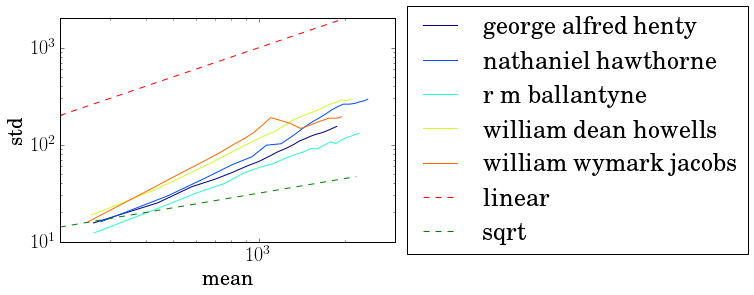

In [91]:
for i in aut:
    m,s=zip(*scaling(dic_scaling,i))
    plt.plot(m,s,label=i,color=color_map[i])
plt.plot(xrange(2*10**2,3*10**3,10**3),xrange(2*10**2,3*10**3,10**3),'r--',label='linear')
plt.plot(xrange(2*10**2,3*10**3,10**3),np.sqrt(xrange(2*10**2,3*10**3,10**3)),'g--',label='sqrt')
plt.xlabel('mean')
plt.ylabel('std')
plt.loglog()
plt.xlim((2*10**2,3*10**3))
plt.ylim((10**1,2*10**3))
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('scaling.pdf', bbox_inches='tight', bbox_extra_artist=[lgd])

plt.show()


# Joyce Ulysses
See the scaling of a bunch of subsample form a single book

In [92]:
mask1=df['author']=='james joyce'
mask2=df['title']=='ulysses'

In [93]:
ulysses=df[mask1&mask2]

In [95]:
len(txt_uly)

267130

In [97]:
def partition(lst, n):
    division = len(lst) / float(n)
    return [ lst[int(round(division * i)): int(round(division * (i + 1)))] for i in xrange(n) ]


In [98]:
uly_part=partition(txt_uly,100)

In [99]:
len(uly_part[0])

2671

In [107]:
sample=np.random.choice(uly_part,50,replace=False)

In [108]:
len(sample)

50

In [114]:
Joyce=[]
for sam in uly_part:
    Joyce.append(NewWords(sam,10))

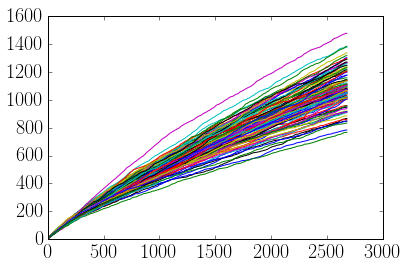

In [115]:
for j in Joyce:
    plt.plot([(1+i)*10 for i in range(len(j))],j)

In [116]:
def scaling_joy(dic):
    #print tmp
    trans=map(None,*dic)
    transposed=[[x for x in L if x is not None] for L in trans]
    #print transposed
    mean_sd=[(np.nanmean(i),np.nanstd(i)) for i in transposed]
    return mean_sd

In [117]:
m_sd=scaling_joy(Joyce)

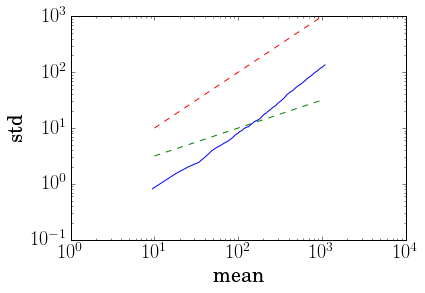

In [118]:
mm,ss=zip(*m_sd)
plt.plot(mm,ss,label=i,color='b')
plt.plot(xrange(10,10**3,10**1),xrange(10,10**3,10**1),'r--',label='linear')
plt.plot(xrange(10,10**3,10**1),np.sqrt(xrange(10,10**3,10**1)),'g--',label='sqrt')
plt.xlabel('mean')
plt.ylabel('std')
plt.loglog()
plt.show()

# Randomize in chunks

In [180]:
def chunkLen(lst,n):
    return filter(None,[ lst[ n*i:n*i+n ] for i in xrange(len(lst)) if len( lst[ n*i:n*i+n ] )>=n ])

def randomize_in_chunks(lst,n):
    uly_part=chunkLen(lst,n)
    random.shuffle(uly_part)
    uly_tmp=list(chain.from_iterable(uly_part))
    #print uly_tmp
    uly_part=partition(uly_tmp,100)
    print '-- ', len(uly_part[0])
    Joyce=[]
    for sam in uly_part:
        Joyce.append(NewWords(sam,10))
    for j in Joyce:
        plt.plot([(1+i)*10 for i in range(len(j))],j)
    plt.show()
    m_sd=scaling_joy(Joyce)
    mm,ss=zip(*m_sd)
    plt.plot(mm,ss,label=i,color='b')
    plt.plot(xrange(10,10**3,10**1),xrange(10,10**3,10**1),'r--',label='linear')
    plt.plot(xrange(10,10**3,10**1),np.sqrt(xrange(10,10**3,10**1)),'g--',label='sqrt')
    plt.xlabel('mean')
    plt.ylabel('std')
    plt.loglog()
    plt.show()

Randomizing blocks of length  1
--  2671


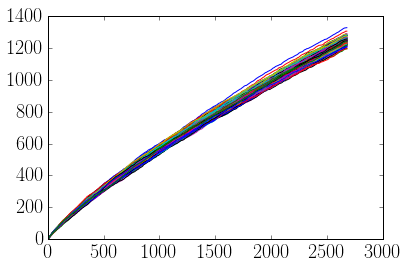

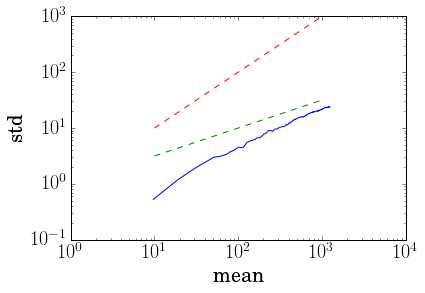

Randomizing blocks of length  2
--  2671


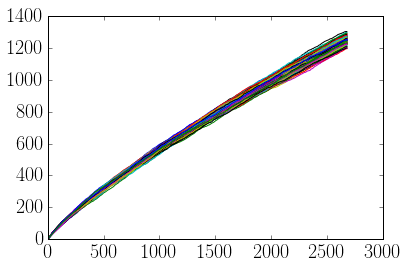

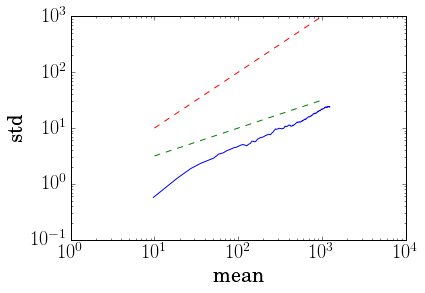

Randomizing blocks of length  10
--  2671


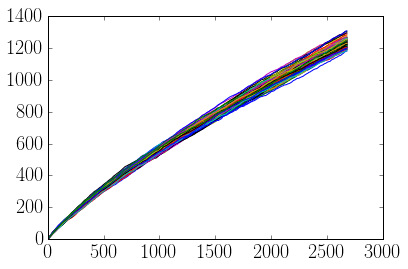

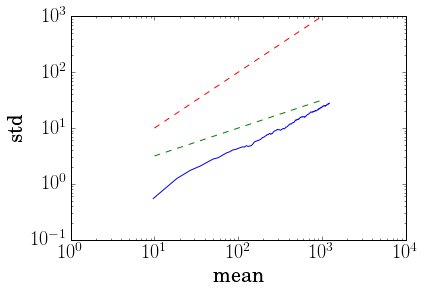

Randomizing blocks of length  20
--  2671


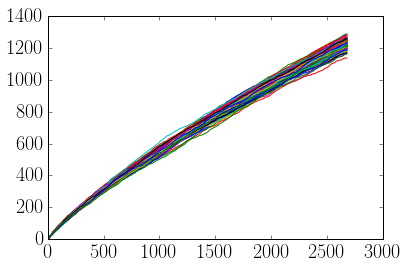

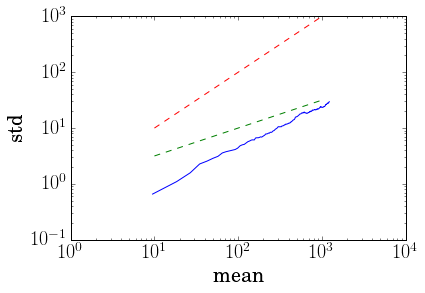

Randomizing blocks of length  50
--  2671


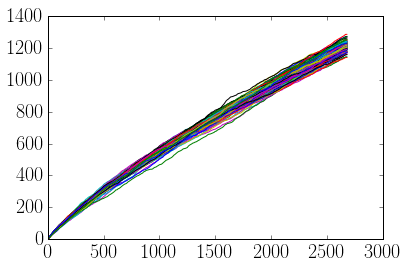

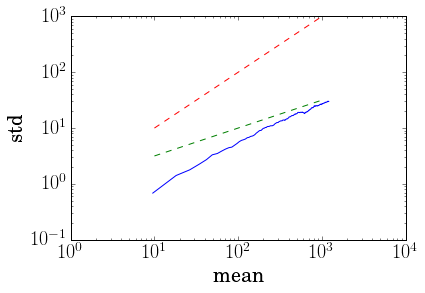

Randomizing blocks of length  100
--  2671


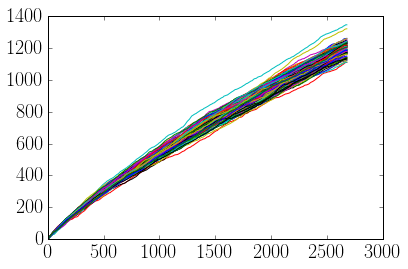

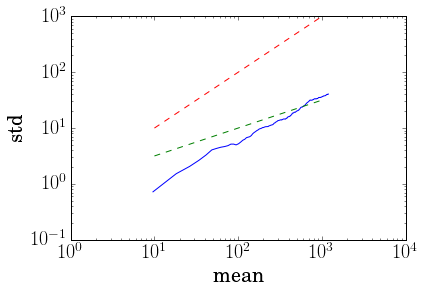

Randomizing blocks of length  150
--  2670


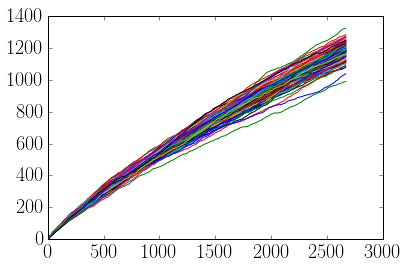

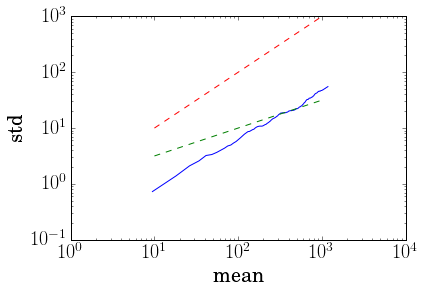

Randomizing blocks of length  200
--  2670


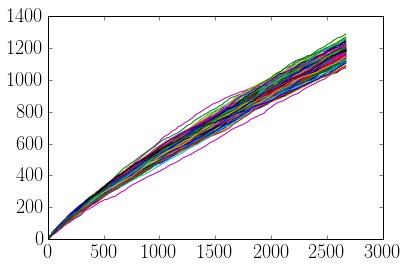

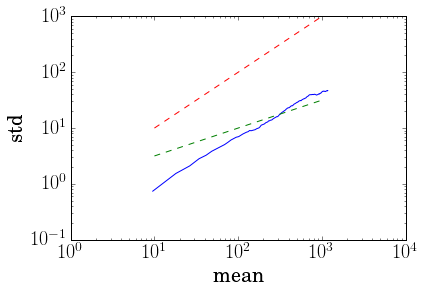

Randomizing blocks of length  500
--  2670


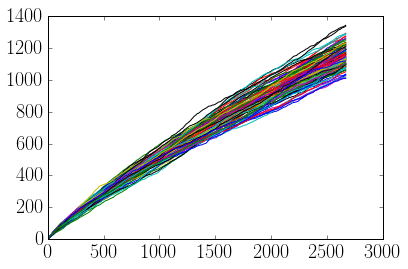

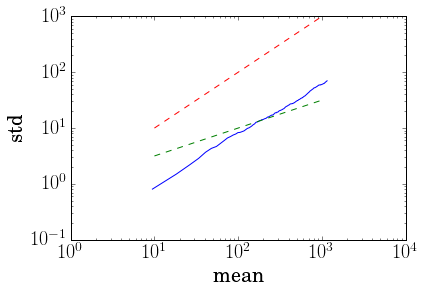

In [181]:
for i in [1,2,10,20,50,100,150,200,500]:
    print 'Randomizing blocks of length ', i
    randomize_in_chunks(txt_uly,i)